<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center>


<h1>Data Wrangling with Tidyverse</h1>


Estimated Time Needed: **40 min**

<h3>Welcome!</h3>

By the end of this notebook, you will have learned the basics of Data Wrangling! Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.


### Table of Contents:
* [1. Missing Values and Formatting](#missing_values)
    * [1.1 Identify Missing Values](#identify_missing_values)
    * [1.2 Handle Missing Values](#handle_missing_values)
    * [1.3 Correct Data Format](#correct_data_format)
* [2. Data Normalization](#data_normalization)
    * [2.1 Simple Scaling](#simple_scale)
    * [2.2 Min-max](#min_max)
    * [2.3 Standardization (Z-score)](#data_standardization)
* [4. Binning](#binning)
* [5. Indicator Variable](#indicator)


## Load Libraries and Data


The Tidyverse library is a useful tool that enables us to read various datasets into a data frame; our Jupyter notebook platforms have a built-in <b>Tidyverse library</b> so we do not need to install the package prior to loading library.  However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented line of code to install Tidyverse before loading.

First, load the tidyverse library. 


In [ ]:
# Uncomment to install tidyverse if running locally
# install.packages("tidyverse")

In [1]:
# Load tidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.0     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The original Airline dataset is hosted on <a href="https://developer.ibm.com/exchanges/data/all/airline/">IBM Data Asset eXchange</a>. This sample dataset can be found <a href="https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz">here</a>.  We will be using a subset of the original dataset, which contains just LAX to JFK flights, throughout this course. 

Now using the subset dataset link, you can load it and store as a dataframe `sub_airline`:


In [7]:
# url where the data is located
#url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# download the file
#download.file(url, destfile = "lax_to_jfk.tar.gz")

# untar the file so we can get the csv only
# if you run this on your local machine, then can remove tar = "internal" 
#untar("lax_to_jfk.tar.gz", tar = "internal")

# read_csv only 
sub_airline <- read_csv("./lax_to_jfk.csv",
                     col_types = cols('DivDistance' = col_number(), 
                                      'DivArrDelay' = col_number()))

<a id="missing_values"></a>
## 1. Missing Values and Formatting

Now that we have the data loaded, let's first take a look at the data using the method `head()`. 


In [8]:
head(sub_airline)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,⋯,2,NA,NA,NA,NA,NA,-1,0,NA,NA
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,⋯,0,NA,NA,NA,NA,NA,4,4,NA,NA
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,⋯,0,NA,NA,NA,NA,NA,-8,0,NA,NA
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,⋯,0,NA,NA,NA,NA,NA,7,7,NA,NA
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,⋯,0,NA,NA,NA,NA,NA,-4,0,NA,NA
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,⋯,0,NA,NA,NA,NA,NA,2,2,NA,NA


As we can see, several NA (not available) appeared in the dataframe; those are missing values which may hinder our further analysis. 
So, how do we identify all those missing values and deal with them? 

In the following sections, we will go over the steps for working with missing data:
- Identify missing data
- Deal with missing data
- Correct data format


<a id="identify_missing_values"></a>
### 1.1 Identify Missing Malues

In R, there are some special symbols to represent special cases in data:
* `NA`: missing values are represented by the symbol `NA` (not available), it is a special symbol in R. Note, that `"NA"` (a string) is not the same as `NA`. 
* `NaN`: Impossible values (e.g., dividing by zero) are represented by the symbol `NaN` (not a number).

The missing values in airline dataset are already represented with R's `NA` symbol. We use R's built-in (also called **base R**) functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><code>is.na(x)</code>: x can be a vector or list, this method returns a vector of TRUE or FALSE depending if the according element in x is <code>NA</code> or not. For example <code>is.na(c(1, NA))</code> returns <code>FALSE TRUE</code></li>
    <li><code>anyNA(x, recursive = FALSE)</code>: x can be a vector or list, this method returns TRUE if x contains any NAs and FALSE otherwise. For example <code>is.na(c(1, NA))</code> returns <code>TRUE</code></li>
</ol>


In [9]:
is.na(c(1, NA))        #> FALSE  TRUE
is.na(paste(c(1, NA))) #> FALSE FALSE

[1] FALSE  TRUE

[1] FALSE FALSE

Again, the output for `is.na()` is a vector of logical values where`TRUE` stands for missing value, while `FALSE` stands for not missing value.


In [10]:
anyNA(c(1, NA))   

[1] TRUE

The output for `anyNA()` is a vector of logical values where `TRUE` stands for at least one missing value in the vector, while `FALSE` stands for no missing values in the vector.


#### Counting Missing Values
    
We can quickly figure out the number of missing values in each column. As mentioned above, when using the function `is.na()`, `TRUE` represents a missing value while `FALSE` is otherwise.  The method  `sum()`  counts the number of `TRUE` values. 
    
Let's check how many missing values in `CarrierDelay` column and also check how many missing values in each column:


In [11]:
# counting missing values
sub_airline %>%
  summarize(count = sum(is.na(CarrierDelay)))

count
<int>
2486


We can use `purrr::map()` to count missing values in each of the columns. 

`map()` essentially maps (applies) a function or formula to each given element.
In the code below, it is mapping a *formula*, `~sum(is.na(.))`, that sums the NAs to every column in `sub_airline`. Since it is using a *formula*, you will also notice two special operators dot `.` and tilde `~`:
* The tilde `~` separates the left side of a formula with the right side. Normally formulas are two-sided like `y ~ x`, in this case in `map()`, the formula gets converted to a function so it only needs the right side.
* The dot `.` refers to each column in the dataset. If you view the documentation with `?map`, you can see that you use `.` when the function takes in just one parameter (a column in this case).

See `?formula` and `?map` for more information.


In [12]:
map(sub_airline, ~sum(is.na(.)))

$Month
[1] 0

$DayOfWeek
[1] 0

$FlightDate
[1] 0

$Reporting_Airline
[1] 0

$Origin
[1] 0

$Dest
[1] 0

$CRSDepTime
[1] 0

$CRSArrTime
[1] 0

$DepTime
[1] 0

$ArrTime
[1] 0

$ArrDelay
[1] 0

$ArrDelayMinutes
[1] 0

$CarrierDelay
[1] 2486

$WeatherDelay
[1] 2486

$NASDelay
[1] 2486

$SecurityDelay
[1] 2486

$LateAircraftDelay
[1] 2486

$DepDelay
[1] 0

$DepDelayMinutes
[1] 0

$DivDistance
[1] 2855

$DivArrDelay
[1] 2855

In [13]:
# Check dimensions of the dataset
dim(sub_airline)

[1] 2855   21

Based on the summary above, "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay" and "LateAircraftDelay" columns have 2486 rows of missing data, while "DivDistance" and "DivArrDelay" columns have 2855 rows of missing data. All other columns do not have missing data.
<ol>
    <li>"CarrierDelay": 2486 missing data</li>
    <li>"WeatherDelay": 2486 missing data</li>
    <li>"NASDelay": 2486 missing data</li>
    <li>"SecurityDelay" : 2486 missing data</li>
    <li>"LateAircraftDelay": 2486 missing data</li>
    <li>"DivDistance": 2855 missing data</li>
    <li>"DivArrDelay": 2855 missing data</li>
</ol>


<a id="handle_missing_values"></a>
### 1.2 Handle Missing Data
**How to deal with missing data?**

<ol>
    <li>Drop data<br>
        a. Drop the whole column<br>
        b. Drop the whole row
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Generally, you should not blindly drop NAs. However if an entire column or almost the entire column contains NAs, then it may be a good idea to leave it out. In our dataset, columns `DivDistance` and `DivArrDelay` are nearly all empty so we will drop them entirely.

**Drop the whole column:**
<ul>
    <li>"DivDistance": 2855 missing data</li>
    <li>"DivArrDelay": 2855 missing data</li>
</ul>


In [14]:
drop_na_cols <- sub_airline %>% select(-DivDistance, -DivArrDelay)
dim(drop_na_cols)
head(drop_na_cols)

[1] 2855   19

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,2,2,NA,NA,NA,NA,NA,-1,0
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,-21,0,NA,NA,NA,NA,NA,4,4
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,-14,0,NA,NA,NA,NA,NA,-8,0
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,-3,0,NA,NA,NA,NA,NA,7,7
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,-13,0,NA,NA,NA,NA,NA,-4,0
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,-20,0,NA,NA,NA,NA,NA,2,2


**Drop the whole row:**
<ul>
    <li>"CarrierDelay": 2486 missing data</li>
    <li>"WeatherDelay": 2486 missing data</li>
    <li>"NASDelay": 2486 missing data</li>
    <li>"SecurityDelay" : 2486 missing data</li>
    <li>"LateAircraftDelay": 2486 missing data</li>   
</ul>

We see `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay` have the same amount of missing values from the summary. By dropping the missing values in one column will also solve the missing value issues in the others.


In [15]:
# Drop the missing values
drop_na_rows <- drop_na_cols %>% drop_na(CarrierDelay)
dim(drop_na_rows)
head(drop_na_rows)

[1] 369  19

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,5,2018-08-03,B6,LAX,JFK,0013,0839,0034,0913,34,34,11,0,23,0,0,21,21
6,4,2006-06-01,AA,LAX,JFK,1515,2332,1507,2353,21,21,0,0,21,0,0,-8,0
1,7,2007-01-28,UA,LAX,JFK,0845,1656,0838,1713,17,17,0,0,17,0,0,-7,0
6,5,2013-06-28,AA,LAX,JFK,1200,2045,1328,2220,95,95,5,0,7,0,83,88,88
9,1,2010-09-27,DL,LAX,JFK,1330,2208,1426,2316,68,68,0,0,68,0,0,56,56
10,3,2005-10-12,AA,LAX,JFK,0930,1755,0958,1823,28,28,0,0,28,0,0,28,28


We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. In this scenario, we would like to replace missing values with 0.

**Convert NA to 0**

In the airline dataset, missing data for the different types of delay corresponds to no delay. So, we can replace these NAs with 0 in this case.
To do this we use the function: 
 <pre>tidyr::replace_na(data, replace, ...)</pre>

The columns that corresponds with types of delays are CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay. For example
if `CarrierDelay = NA` then this means there is no delay in Carrier, so the delay in minutes can be changed to 0 or `CarrierDelay = 0`. Let's transform these columns and see the result:


In [16]:
# Replace the missing values in five columns
replace_na <- drop_na_rows %>% replace_na(list(CarrierDelay = 0,
                                              WeatherDelay = 0,
                                              NASDelay = 0,
                                              SecurityDelay = 0,
                                              LateAircraftDelay = 0))
head(replace_na)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,5,2018-08-03,B6,LAX,JFK,0013,0839,0034,0913,34,34,11,0,23,0,0,21,21
6,4,2006-06-01,AA,LAX,JFK,1515,2332,1507,2353,21,21,0,0,21,0,0,-8,0
1,7,2007-01-28,UA,LAX,JFK,0845,1656,0838,1713,17,17,0,0,17,0,0,-7,0
6,5,2013-06-28,AA,LAX,JFK,1200,2045,1328,2220,95,95,5,0,7,0,83,88,88
9,1,2010-09-27,DL,LAX,JFK,1330,2208,1426,2316,68,68,0,0,68,0,0,56,56
10,3,2005-10-12,AA,LAX,JFK,0930,1755,0958,1823,28,28,0,0,28,0,0,28,28


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>According to the example above, let's try to replace NA in "CarrierDelay" column by the mean value.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


In [17]:
#<details>
 #   <summary>Click here for the solution.</summary>

#```r
# Calculate the mean vaule for "CarrierDelay" column
carrier_mean <- mean(drop_na_rows$CarrierDelay)

# Replace NA by mean value in "CarrierDelay" column
sub_airline %>% replace_na(list(CarrierDelay = carrier_mean))
#```
#</details>


Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,⋯,2,18.04878,NA,NA,NA,NA,-1,0,NA,NA
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,⋯,0,18.04878,NA,NA,NA,NA,4,4,NA,NA
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,⋯,0,18.04878,NA,NA,NA,NA,-8,0,NA,NA
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,⋯,0,18.04878,NA,NA,NA,NA,7,7,NA,NA
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,⋯,0,18.04878,NA,NA,NA,NA,-4,0,NA,NA
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,⋯,0,18.04878,NA,NA,NA,NA,2,2,NA,NA
12,1,2012-12-03,VX,LAX,JFK,1040,1900,1038,1901,⋯,1,18.04878,NA,NA,NA,NA,-2,0,NA,NA
12,3,2004-12-01,HP,LAX,JFK,2200,0613,2158,0533,⋯,0,18.04878,NA,NA,NA,NA,-2,0,NA,NA
2,4,1997-02-13,UA,LAX,JFK,0800,1615,0802,1640,⋯,25,18.04878,NA,NA,NA,NA,2,2,NA,NA


<b>Good!</b> Now, we obtain the dataset with no missing values.


<a id="correct_data_format"></a>
### 1.3 Correct Data Format
**We are almost there!**

<p>The last step in data cleaning is checking and making sure that all data is in the correct format.</p>

#### Scoped dplyr Verbs
In dplyr, you can add `_all` and `_if` to the end of it's main functions like `mutate`, `filter`, `group_by`, and `summarize`. 

| dply function  | _all           | _if             |
| ------------- |:--------------:| ----------------:|
| mutate         | `mutate_all()`  |`mutate_if()`     |
| filter         | `filter_all()`  |`filter_if()`     |
| group_by       |`group_by_all()` |`group_by_if()`   |
| summarize      | `summarize_all()`  | `summarize_if()` |

These are called **scoped** dplyr verbs. The `_all` variant applies an operation on *all* variaibles and the `_if` variant applies an operation to a variable if the given function is `TRUE`.


Now that we understand these different versions of dplyr functions, let's list the data types for each column by using `summarize_all()` and `gather()`:


In [18]:
sub_airline %>% 
    summarize_all(class) %>% 
    gather(variable, class)

variable,class
<chr>,<chr>
Month,numeric
DayOfWeek,numeric
FlightDate,Date
Reporting_Airline,character
Origin,character
Dest,character
CRSDepTime,character
CRSArrTime,character
DepTime,character


<p>It is important for later analysis to explore the feature’s data type and convert them to the correct data types; otherwise, the developed models later on may behave strangely, and totally valid data may end up being treated like missing data.</p> 

Let's re-format the `FlightDate` field into three separate fields (year, month, day) using `separate()`.


In [19]:
date_airline <- replace_na %>% 
    separate(FlightDate, sep = "-", into = c("year", "month", "day"))

head(date_airline)

Month,DayOfWeek,year,month,day,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,⋯,ArrTime,ArrDelay,ArrDelayMinutes,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,5,2018,08,03,B6,LAX,JFK,0013,0839,⋯,0913,34,34,11,0,23,0,0,21,21
6,4,2006,06,01,AA,LAX,JFK,1515,2332,⋯,2353,21,21,0,0,21,0,0,-8,0
1,7,2007,01,28,UA,LAX,JFK,0845,1656,⋯,1713,17,17,0,0,17,0,0,-7,0
6,5,2013,06,28,AA,LAX,JFK,1200,2045,⋯,2220,95,95,5,0,7,0,83,88,88
9,1,2010,09,27,DL,LAX,JFK,1330,2208,⋯,2316,68,68,0,0,68,0,0,56,56
10,3,2005,10,12,AA,LAX,JFK,0930,1755,⋯,1823,28,28,0,0,28,0,0,28,28


For a number of reasons, including when you import a dataset into R or process a variable, the data type may be incorrectly established. For example, here we notice that the assigned data type to for `year`, `month`, and `day` is “character” although the expected data type should really be numeric. You can change the type using `mutate_all()` and `mutate_if()`. 

In the below code, it is mutating `year`, `month`, and `day` values to numeric only if it is a character. Note that in `mutate_if()`, the first parameter is the function `is.character` that checks a *condition* while the second parameters is the function `as.numeric` that *modifies* the data *if* the condition is true.


In [20]:
date_airline %>%
    select(year, month, day) %>%
    mutate_all(type.convert) %>%
    mutate_if(is.character, as.numeric)

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `year = (function (x, ...) ...`.
Caused by warning in `type.convert.default()`:
! 'as.is' should be specified by the caller; using TRUE
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


year,month,day
<int>,<int>,<int>
2018,8,3
2006,6,1
2007,1,28
2013,6,28
2010,9,27
2005,10,12
2011,4,23
2005,5,21
2011,8,14


<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.


<a id="data_normalization"></a>

## 2. Data Normalization

**Why normalization?**

Normalization is the process of transforming values of several features (variables) into a similar range. An example of why this could be important is if you have a variable for income and another variable for age. Income is likely much bigger values than age, so in a model, income would naturally influence the model more. Thus, normalization helps make comparisons between different variables more *fair*.

There are different types of ways to normalize:
* **Simple scaling**: divides each value by the maximum value in a feature. The new range is between 0 and 1.
$$x_{new} = \frac{x_{old}}{x_{max}}$$
* **Min-max**: subtracts the minimum value from the original and divides by the maximum minus the minimum. The minimum becomes 0 and the maximum becomes 1.
$$x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$$
* **Standardization (Z-score)**: subtract the mean ($\mu$) of the feature and divide by the standard deviation ($\sigma$).
$$x_{new} = \frac{x_{old} - \mu}{\sigma}$$

From these methods, you can see that typically normalizations include scaling the variable so that the range is from 0 to 1.


<a id="simple_scale"></a>
### 2.1 Simple scaling

**Simple scaling** divides each value by the maximum value in a feature. The new range is between 0 and 1.
$$x_{new} = \frac{x_{old}}{x_{max}}$$

**Example**

To demonstrate simpling scaling, let's say we want to scale the column "ArrDelay".
    
* **Target:** Would like to Normalize those variables so their value ranges from 0 to 1.
* **Approach:** Replace the original value by (original value)/(maximum value)


In [21]:
simple_scale <- sub_airline$ArrDelay / max(sub_airline$ArrDelay)
head(simple_scale)

[1]  0.002932551 -0.030791789 -0.020527859 -0.004398827 -0.019061584
[6] -0.029325513

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #2: </h1>

<b>According to the example above, normalize the column "DepDelay" using the simple scaling technique.</b>
</div>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details>
    <summary>Click here for the solution.</summary>

```r
simple_scale2 <- sub_airline$DepDelay/max(sub_airline$DepDelay)
head(simple_scale2)
```
                 
</details>


<a id="min_max"></a>
### 2.2 Min-max

**Min-max** subtracts the minimum value from the original and divides by the maximum minus the minimum. The minimum becomes 0 and the maximum becomes 1.
$$x_{new} = \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$$

**Example**

Using "ArrDelay" as an example again, you can transform this column using the min-max technique:


In [22]:
minmax_scale <- (sub_airline$ArrDelay - min(sub_airline$ArrDelay)) /
                (max(sub_airline$ArrDelay) - min(sub_airline$ArrDelay))
head(minmax_scale)

[1] 0.09933775 0.06887417 0.07814570 0.09271523 0.07947020 0.07019868

<a id="data_standardization"></a>
### 2.3 Data Standardization (Z-score)

**Standardization (Z-score)** subtracts the mean ($\mu$) of the feature and divides by the standard deviation ($\sigma$).
$$x_{new} = \frac{x_{old} - \mu}{\sigma}$$


**Example**

Let's use "ArrDelay" again. We can use `mean()` to find the mean of the feature and we can use `sd()` to find the standard deviation of the feature.


In [23]:
z_scale <- (sub_airline$ArrDelay - mean(sub_airline$ArrDelay)) / sd(sub_airline$ArrDelay)
head(z_scale)

[1] -0.04815631 -0.60922513 -0.43846505 -0.17012779 -0.41407075 -0.58483083

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3: </h1>

<b>According to the example above, standardize the "DepDelay" column.</b>
</div>


In [25]:
# Write your code below and press Shift+Enter to execute 
z_scale2 <- (sub_airline$DepDelay - mean(sub_airline$DepDelay)) / sd(sub_airline$DepDelay)
head(z_scale2)

[1] -0.28063352 -0.14031185 -0.47708387 -0.05611884 -0.36482653 -0.19644052

<details>
    <summary>Click here for the solution.</summary>

```r
z_scale2 <- (sub_airline$DepDelay - mean(sub_airline$DepDelay)) / sd(sub_airline$DepDelay)
head(z_scale2)
```
                 
</details>


<a id="binning"></a>
## 4. Binning
### Why use binning?
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

**Example:**
<p>Using binning, we categorize arrival delays into four bins by quartiles. Quartiles refer to the boundaries that divide observations into four defined intervals. They are often determined based on the values of data points and how they are compared with the rest of the dataset. In the actual airline dataset, "ArrDelay" is a numerical variable ranging from -73 to 682, it has 2855 unique values. We can categorize them into 4 bins. Can we rearrange them into four ‘bins' to simplify analysis? </p>

We will use the tidyverse method `mutate(quantile_rank = ntile())` to segment the "ArrDelay" column into 4 bins


### Example of Binning Data In Tidyverse


Lets plot the histogram of flight arrival delays, to see what the distribution of "ArrDelay" looks like.


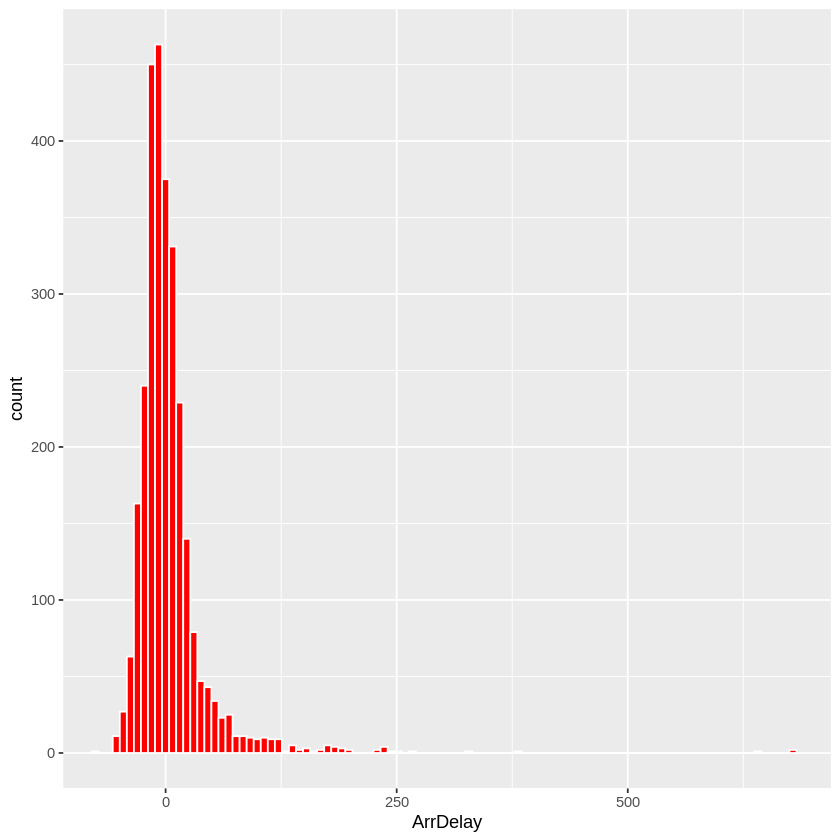

In [26]:
ggplot(data = sub_airline, mapping = aes(x = ArrDelay)) +
  geom_histogram(bins = 100, color = "white", fill = "red") +
  coord_cartesian(xlim = c(-73, 682))

First we use the dplyr function `ntile` to break “ArrDelay” into 4 buckets, which have equal amount of observations of flight arrival delays. We then create a list “quantile_rank” that contains 4 bins, which are respectively labeled "1", "2", "3", "4". So bin 1 would contain the first 25% of data, bin 2 the next 25% of data and so on.


In [27]:
binning <- sub_airline %>%
      mutate(quantile_rank = ntile(sub_airline$ArrDelay,4))

head(binning)

Month,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,⋯,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDelay,DepDelayMinutes,DivDistance,DivArrDelay,quantile_rank
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,⋯,NA,NA,NA,NA,NA,-1,0,NA,NA,3
11,4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,⋯,NA,NA,NA,NA,NA,4,4,NA,NA,1
8,5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,⋯,NA,NA,NA,NA,NA,-8,0,NA,NA,2
4,7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,⋯,NA,NA,NA,NA,NA,7,7,NA,NA,2
11,3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,⋯,NA,NA,NA,NA,NA,-4,0,NA,NA,2
4,1,1992-04-06,UA,LAX,JFK,1450,2308,1452,2248,⋯,NA,NA,NA,NA,NA,2,2,NA,NA,1


The observations are put into different bins based on the flights' delay minutes. The larger the bin label is, the longer the flight was delayed. 

Now if we look at a histogram of the bins, you can see that all bins are equal.


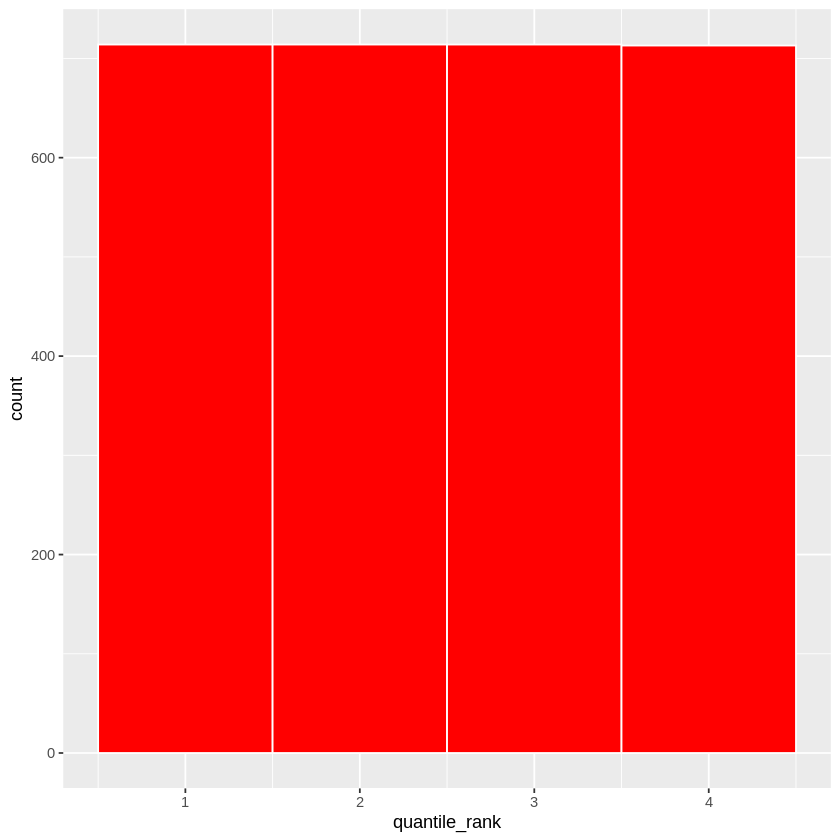

In [28]:
ggplot(data = binning, mapping = aes(x = quantile_rank)) +
  geom_histogram(bins = 4, color = "white", fill = "red")

<a id="indicator"></a>
## 5. Indicator variable
#### What is an indicator variable?

An indicator variable (or dummy variable) is a **numerical variable** used to **label categories**. They are called 'dummies' because the numbers themselves don't have inherent meaning. 


**Why we use indicator variables?**
<p>
Regression models need numerical variables, however categorical variables in their original forms are strings. Using indicator variables allows us to be able to use these categorical variables in regression models.
</p>

**Example**
<p>
    In the airline dataset, the "Reporting_Airline" feature is a categorical variable that has nine values, "AA", "AS", "B6", "DL", "HP", "PA (1)", "TW", "UA" or "VX”, which are in character type. For further analysis, we need to convert these variables into some form of numeric format. 
</p>


We will use the tidyverse's method `spread()` method to convert categorical variables to dummy variables. The parameters to use in the function are:
* `key`: the column to convert into categorical values
* `value`: the value you want to set the key to
* `fill`: fills the missing values with this value

Also keep in mind that the method will drop the "Reporting_Airline" column by default. So if you used "ArrDelay" as the key value instead, that column would get dropped.

The below code does the following:
1. `mutate` - creates a column `dummy` with all 1's then
2. `spread` - creates new column for every `Reporting_Ariline` and sets the value to 1 from `dummy`. But replaces the 1 with a 0 if the corresponding value is `NA` in `Reporting_Airline` then
3. `slice` - looks at the specified rows


In [29]:
sub_airline %>%
  mutate(dummy = 1) %>% # column with single value
  spread(
    key = Reporting_Airline, # column to spread
    value = dummy,
    fill = 0) %>%
  slice(1:5)

Month,DayOfWeek,FlightDate,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,⋯,DivArrDelay,AA,AS,B6,DL,HP,PA (1),TW,UA,VX
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,LAX,JFK,2210,0615,2209,0617,2,⋯,NA,0,0,0,0,0,0,0,1,0
11,4,2018-11-29,LAX,JFK,1045,1912,1049,1851,-21,⋯,NA,0,1,0,0,0,0,0,0,0
8,5,2015-08-28,LAX,JFK,0805,1634,0757,1620,-14,⋯,NA,0,0,0,0,0,0,0,1,0
4,7,2003-04-20,LAX,JFK,2205,0619,2212,0616,-3,⋯,NA,0,0,0,1,0,0,0,0,0
11,3,2005-11-30,LAX,JFK,0840,1653,0836,1640,-13,⋯,NA,0,0,0,0,0,0,0,1,0


When a value occurs in the original feature, we set the corresponding value to one in the new feature; the rest of the features are set to zero. 

So in the output above, for the first row, the reporting airline is "UA". Therefore, the feature "UA" is set to one and the other features to zero. 
Similarly, for the second row, the reporting airline value is "AS". Therefore, the feature "AS" is set to one and the other features to zero.


Alternatively, instead of assigning dummy values 0 or 1, we can assign flight delay values to each feature. So this will also create new columns, one for each `Reporting_Airline`. Taking the first row for example, the column "UA" is now set to 2 because that is the value from ArrDelay.


In [30]:
sub_airline %>% 
  spread(Reporting_Airline, ArrDelay) %>% 
  slice(1:5)

Month,DayOfWeek,FlightDate,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelayMinutes,⋯,DivArrDelay,AA,AS,B6,DL,HP,PA (1),TW,UA,VX
<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,5,2003-03-28,LAX,JFK,2210,0615,2209,0617,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2,NA
11,4,2018-11-29,LAX,JFK,1045,1912,1049,1851,0,⋯,NA,NA,-21,NA,NA,NA,NA,NA,NA,NA
8,5,2015-08-28,LAX,JFK,0805,1634,0757,1620,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-14,NA
4,7,2003-04-20,LAX,JFK,2205,0619,2212,0616,0,⋯,NA,NA,NA,NA,-3,NA,NA,NA,NA,NA
11,3,2005-11-30,LAX,JFK,0840,1653,0836,1640,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-13,NA



**Visualize Airline Category**

Let's visualize how many data points in each airline category.


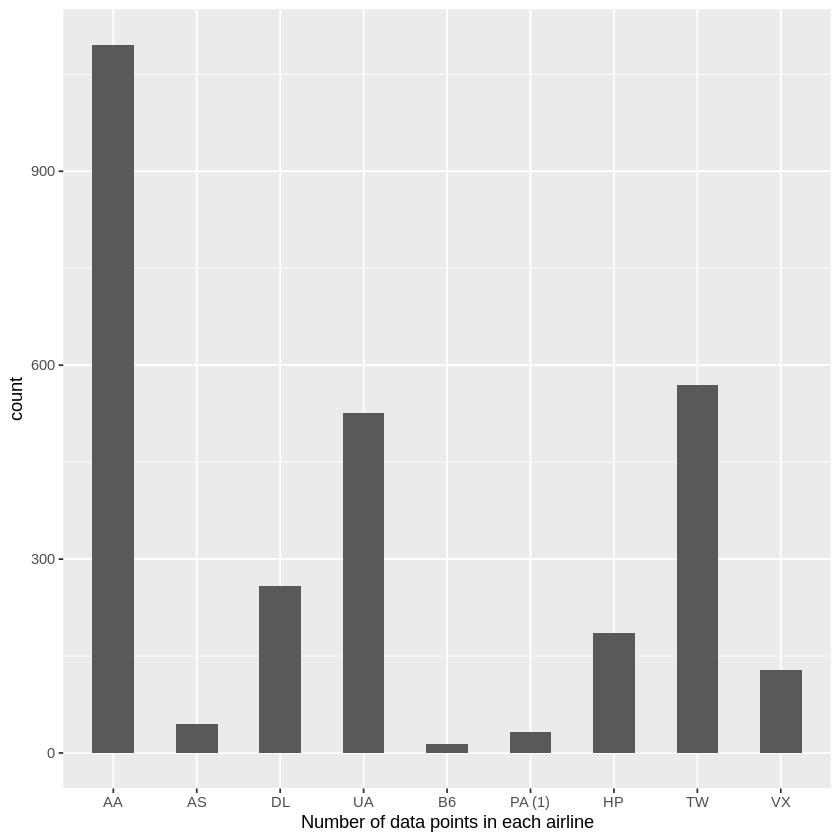

In [31]:
sub_airline %>% # start with data
   mutate(Reporting_Airline = factor(Reporting_Airline,
                                     labels = c("AA", "AS", "DL", "UA", "B6", "PA (1)", "HP", "TW", "VX")))%>%
  ggplot(aes(Reporting_Airline)) +
  stat_count(width = 0.5) +
  labs(x = "Number of data points in each airline")

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>As above, create indicator variable to the column of "Month".</b>
</div>


In [32]:
# Write your code below and press Shift+Enter to execute
sub_airline %>%
  mutate(dummy = 1) %>% # column with single value
  spread(
    key = Month, # column to spread
    value = dummy,
    fill = 0) %>%
  slice(1:5)

DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,⋯,3,4,5,6,7,8,9,10,11,12
<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,2,⋯,1,0,0,0,0,0,0,0,0,0
4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,-21,⋯,0,0,0,0,0,0,0,0,1,0
5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,-14,⋯,0,0,0,0,0,1,0,0,0,0
7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,-3,⋯,0,1,0,0,0,0,0,0,0,0
3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,-13,⋯,0,0,0,0,0,0,0,0,1,0


<details>
    <summary>Click here for the solution.</summary>

```r
sub_airline %>%
  mutate(dummy = 1) %>% # column with single value
  spread(
    key = Month, # column to spread
    value = dummy,
    fill = 0) %>%
  slice(1:5)
```
                 
</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Now, create indicator variable to the column of "Month" by applying departure delay values</b>
</div>


In [33]:
# Write your code below and press Shift+Enter to execute 
sub_airline %>% 
  spread(Month, DepDelay) %>% 
  slice(1:5) # Show only the first 5 rows

DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,CRSDepTime,CRSArrTime,DepTime,ArrTime,ArrDelay,⋯,3,4,5,6,7,8,9,10,11,12
<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2003-03-28,UA,LAX,JFK,2210,0615,2209,0617,2,⋯,-1,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-11-29,AS,LAX,JFK,1045,1912,1049,1851,-21,⋯,NA,NA,NA,NA,NA,NA,NA,NA,4,NA
5,2015-08-28,UA,LAX,JFK,0805,1634,0757,1620,-14,⋯,NA,NA,NA,NA,NA,-8,NA,NA,NA,NA
7,2003-04-20,DL,LAX,JFK,2205,0619,2212,0616,-3,⋯,NA,7,NA,NA,NA,NA,NA,NA,NA,NA
3,2005-11-30,UA,LAX,JFK,0840,1653,0836,1640,-13,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-4,NA


<details>
    <summary>Click here for the solution.</summary>

```r
sub_airline %>% 
  spread(Month, DepDelay) %>% 
  slice(1:5) # Show only the first 5 rows
```
                 
</details>


<h1>Thank you for completing this notebook</h1>


<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/yiwen-li-47a019119/" target="_blank">Yiwen Li</a> and <a href="https://www.linkedin.com/in/gabrieladequeiroz/" target="_blank">Gabriela de Queiroz</a>.

<p><a href="https://www.linkedin.com/in/yiwen-li-47a019119/" target="_blank">Yiwen Li</a> has approximately three year experiences in big tech industry. Currently, she is a developer advocate, a data scientist, a product manager at IBM, where she designs and develops data science solutions and Machine Learning models to solve real world problems. She has delivered talks this year in JupyterCon, PyCon, Pyjamas, CrowdCast.ai, Global AI on Tour 2020 and Belpy 2021 with hundreds of attendants per talk. 
    
<a href="https://www.linkedin.com/in/gabrieladequeiroz/" target="_blank">Gabriela de Queiroz</a> is a Sr. Engineering & Data Science Manager at IBM where she manages and leads a team of developers working on Data & AI Open Source projects. She works to democratize AI by building tools and launching new open source projects.
She is the founder of AI Inclusive, a global organization that is helping increase the representation and participation of gender minorities in Artificial Intelligence. She is also the founder of R-Ladies, a worldwide organization for promoting diversity in the R community with more than 190 chapters in 50+ countries.
She has worked in several startups and where she built teams, developed statistical models, and employed a variety of techniques to derive insights and drive data-centric decisions


Copyright © 2021 IBM Corporation. All rights reserved.
